In [1]:
!pip install quandl
import pandas as pd
import quandl
import datetime
import matplotlib
import numpy as np
import matplotlib.pyplot as plt   # Import matplotlib


#work in scrum and agile environments
#experience with docker containers, microservices
#https://eco.sapo.pt/2019/02/26/definedcrowd-vai-contratar-mais-70-profissionais-de-inteligencia-artificial-ate-ao-final-do-ano-ha-vagas-em-lisboa-e-no-porto/
#https://careers.definedcrowd.com/o/machine-learning-engineer-lisbon
  

# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2016,1,1)
end = datetime.date.today()
 
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
s = "AAPL"
apple = quandl.get("WIKI/" + s, start_date=start, end_date=end)
 
type(apple)

  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection


pandas.core.frame.DataFrame

Populating the interactive namespace from numpy and matplotlib


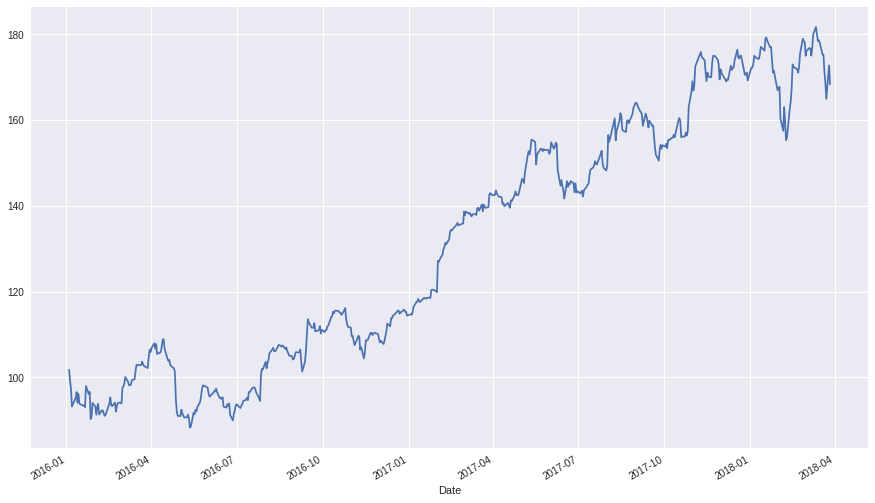

In [2]:

# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
apple["Adj. Close"].plot(grid = True) # Plot the adjusted closing price of AAP

In [4]:
cont="y"
stock_list=list()
tick_list=list()
while cont== "y":
  stock=input("Insert stock:")
  tick=input("Insert tick symbol for stock:")
  cont=input("Continue?") #y for yes, n for no
  stock_list.append(stock)
  tick_list.append(tick)
  
print(stock_list)
print(tick_list)

apple, microsoft, google = (quandl.get("WIKI/" + s, start_date=start, end_date=end) for s in ["AAPL", "MSFT", "GOOG"]) #For different markets, change the tick symbol between the brackets
 
# DataFrame consisting of the adjusted closing price of these stocks, first by making a list of these objects and using the join method
stocks = pd.DataFrame({"AAPL": apple["Adj. Close"],
                      "MSFT": microsoft["Adj. Close"],
                      "GOOG": google["Adj. Close"]})



#stocks.plot(secondary_y = ["AAPL", "MSFT"], grid = True)

Insert stock:apple
Insert tick symbol for stock:AAPL
Continue?y
Insert stock:microsoft
Insert tick symbol for stock:MSFT
Continue?n
['apple', 'microsoft']
['AAPL', 'MSFT']


In [23]:
cont="y"
stock_list=list()
tick_list=list()
stocks=pd.DataFrame()

tick_dick={}

while cont== "y" or cont=="Y":
  #stock=input("Insert stock:")
  tick=input("Insert tick symbol for stock:")
  try:
    stock=(quandl.get("WIKI/" + tick, start_date=start, end_date=end))["Adj. Close"]
    tick_dick.update({tick:stock})
  except:
    print('It was not possible to retrieve the data')  
  
  cont=input("Continue?") #y for yes, n for no

stocks = pd.DataFrame(tick_dick)
stocks.head()

Insert tick symbol for stock:AAPL
Continue?Y
Insert tick symbol for stock:CAC40
It was not possible to retrieve the data
Continue?y
Insert tick symbol for stock:MSFT
Continue?y
Insert tick symbol for stock:GOOG
Continue?n


,AAPL,GOOG,MSFT
Date,,,
2016-01-04,101.783763,741.84,52.181598
2016-01-05,99.233131,742.58,52.419653
2016-01-06,97.291172,743.62,51.467434
2016-01-07,93.185040,726.39,49.677262
2016-01-08,93.677776,714.47,49.829617


#Metrics

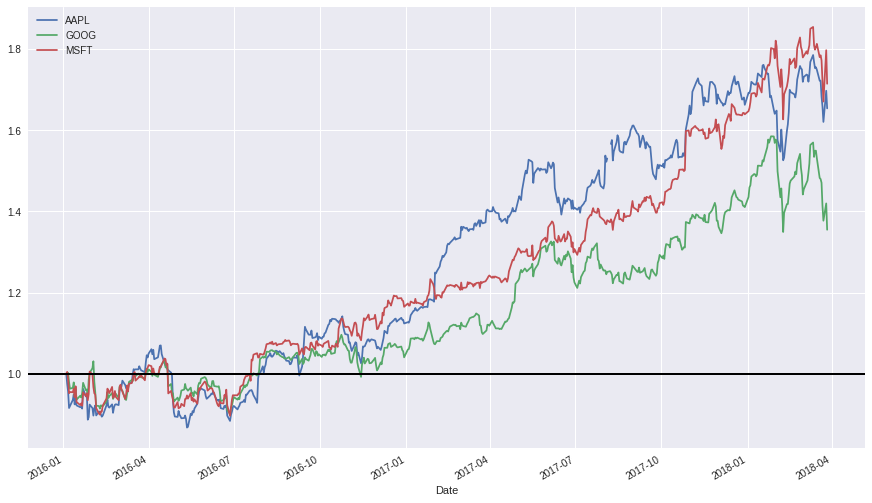

In [24]:
#s Calculate the ROR in %

# df.apply(arg) will apply the function arg to each column in df, and return a DataFrame with the result
# Recall that lambda x is an anonymous function accepting parameter x; in this case, x will be a pandas Series object
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head() - 1
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

In [0]:
##Important Metrics

#Risk Free Rate
tbill = quandl.get("FRED/TB3MS", start_date=start, end_date=end)
rrf = tbill.iloc[-1, 0]    # Get the most recent Treasury Bill rate


In [0]:

stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1)))

stock_change_apr = stock_change * 252 * 100    # There are 252 trading days in a year; the 100 converts to percentages

sy = stock_change_apr.drop("AAPL", 1).std() #standard deviation for y
sx = stock_change_apr.AAPL.std() # standard deviation for x

ybar = stock_change_apr.drop("AAPL", 1).mean() - rrf
xbar = stock_change_apr.AAPL.mean() - rrf

sharpe = (ybar - rrf)/sy
sharpe



GOOG    0.028583
MSFT    0.059284
dtype: float64

In [0]:
if (stocks.isnull().values.any()): #Check for missing values
  stocks_new=stocks.dropna() # Drop rows with missing values and put this new dataset on a new one
  print('Missing values deleted')
stock_new_return = stocks_new.apply(lambda x: x / x[0])

Missing values deleted


In [0]:
#Calcular ROR, Sharpe

#codigo para calcular as metricas de cada um dos stocks no data frame e fazer print usando o nome

def Sharpe_ratio(stock):
  sharpe_buy=np.full_like(stock_new_return,0)
  SR_buy=np.full_like(stock_new_return,0)
  for sharpe_aux1 in range(0,len(sharpe_buy)):
    sharpe_buy[sharpe_aux1]=stock_new_return[stock][sharpe_aux1]-stock_new_return[stock][0]
  SR_buy=(np.mean(sharpe_buy)/np.std(sharpe_buy))
  return SR_buy


for name in list(stocks):
  print('Buy & Hold return for ', name, ':', (stock_new_return[name][-1]-1)*100, '%')
  print('Sharpe Ratio for', name, ':', (Sharpe_ratio(name)))

Buy & Hold return for  AAPL : 65.38983666402582 %
Sharpe Ratio for AAPL : 1.0012053414284998
Buy & Hold return for  GOOG : 35.48743664402028 %
Sharpe Ratio for GOOG : 0.8976818808959294
Buy & Hold return for  MSFT : 71.45891228676957 %
Sharpe Ratio for MSFT : 0.9692604243777492
